###### Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import preprocessing
import tensorflow as tf
import statsmodels
import seaborn as sns
import scipy.stats as stats

In [4]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller as ADFtest
import statsmodels.api as sm

#### EDA

In [5]:
A  = pd.read_csv(r'C:\Users\puter\Desktop\TA\Durhamrain.csv',sep = ';')
A1 = pd.read_csv(r'C:\Users\puter\Desktop\TA\DurhamBridge.csv',sep = ',')
A1.date = pd.to_datetime(A1.date)
A1 = A1.set_index('date').resample('M').mean().reset_index()
A1 = A1[:-1]
A = A[10:]
a = np.mean(np.delete(np.array(A1['avg_level']), np.argmax(A1['avg_level'])))

In [6]:
A6 = np.array(A['rain'])
A7 = A1['avg_level']
A7[np.argmax(A7)] = a
A8 = np.array(A['tmax'])
A9 = np.array(A['tmin'])

data = {'rain':A6,'avg_level':A7,'tmax':A8,'tmin':A9}
datadf = pd.DataFrame(data)

#### Take a look at the data distribution

Before feeding our the data to the model. It is important to figure out the relationship between data variables. Non-target variables that strongly correlated can mess up the model training. So in order to look at the correlation between the data it is important to look at the distribution first to find the proper method to calculate the correlation.

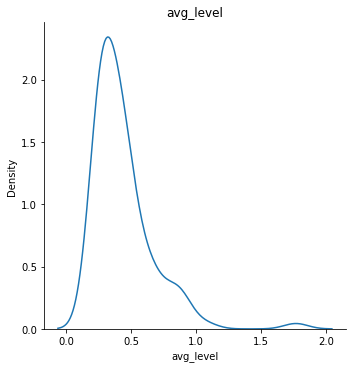

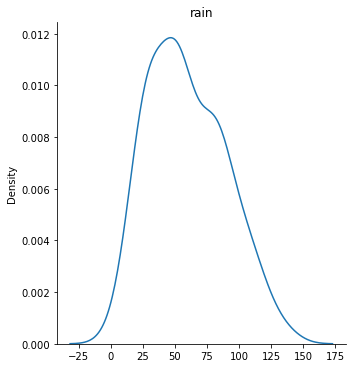

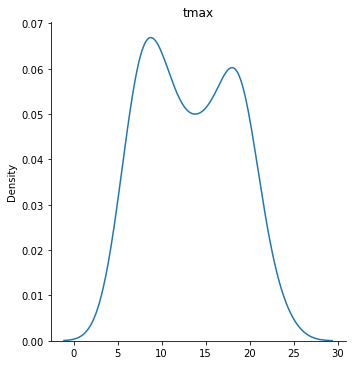

In [6]:
for i,arr in enumerate([A7,A6,A8]):
    sns.displot(arr, kind="kde")
    plt.title(dataarr[i])
    plt.show()

In [5]:
dataarr = ['avg_level','rain','tmax']
for i,arr in enumerate([A7,A6,A8]):
    
    k2, p = stats.normaltest(arr)
    alpha = 0.05
    print('p value for array', dataarr[i])
    print(p)
    if p < alpha: ## Null Hyptohesis(the array came from normal distribution)
        print('Null Hypothesis can be Rejected')
    else:
        print('Null Hypothesis cant be rejected')

p value for array avg_level
2.503939439692749e-17
Null Hypothesis can be Rejected
p value for array rain
0.06660029850666173
Null Hypothesis cant be rejected
p value for array tmax
3.3755505703634255e-10
Null Hypothesis can be Rejected


It is important to find the relation between data and how much they correlated each other. I tried to look into their distribution to find the proper way to calculate their correlation but both Spearman and Pearson method give me the same results.

In [7]:
'''
Central Limit Theorem berlakukah?
'''

datadf.corr(method='spearman')

,rain,avg_level,tmax,tmin
rain,1.000000,0.442062,-0.036498,0.081976
avg_level,0.442062,1.000000,-0.730501,-0.666631
tmax,-0.036498,-0.730501,1.000000,0.972191
tmin,0.081976,-0.666631,0.972191,1.000000


In [8]:
datadf.corr(method='pearson')

,rain,avg_level,tmax,tmin
rain,1.000000,0.549636,-0.067248,0.060060
avg_level,0.549636,1.000000,-0.577909,-0.505449
tmax,-0.067248,-0.577909,1.000000,0.967947
tmin,0.060060,-0.505449,0.967947,1.000000


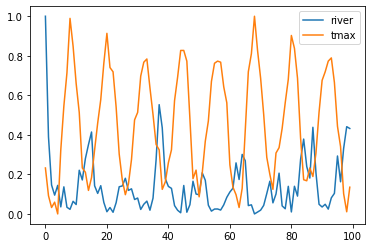

In [10]:
# Bmin = min(A6)
# Bmax = max(A6)
# b = (A6-Bmin)/(Bmax-Bmin)
Bmin = min(A7)
Bmax = max(A7)
b1 = (A7-Bmin)/(Bmax-Bmin)
Bmin = min(A8)
Bmax = max(A8)
b2 = (A8-Bmin)/(Bmax-Bmin)


# plt.plot(np.array(b))
plt.plot(np.array(b1),label='river')
plt.plot(np.array(b2),label='tmax')
plt.legend()
plt.show()

We can see more clearly here that the river discharge and the temprature correlates negatively each other

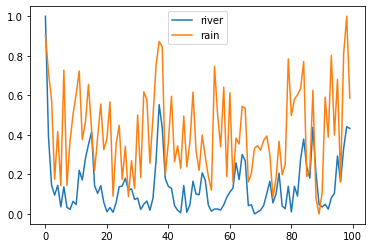

In [8]:
Bmin = min(A6)
Bmax = max(A6)
b = (A6-Bmin)/(Bmax-Bmin)
Bmin = min(A7)
Bmax = max(A7)
b1 = (A7-Bmin)/(Bmax-Bmin)
# Bmin = min(A8)
# Bmax = max(A8)
# b2 = (A8-Bmin)/(Bmax-Bmin)


# plt.plot(np.array(b))
plt.plot(np.array(b1),label='river')
plt.plot(np.array(b),label='rain')
plt.legend()
plt.show()

The rain have lesser correlation with river discharge, using both spearman and pearson method the correlation between the aprroximately~ 0.5. I think it is wise to keep these variables to improve model since it has a bad correlation to the temperature.

In [11]:
dataarr = ['avg_level','rain','tmax']
for i,arr in enumerate([A7,A6,A8]):
    
    p = ADFtest(arr)[1]
    alpha = 0.05
    print('p value for array', dataarr[i])
    print(p)
    if p < alpha: ## Null Hyptohesis(the array came from normal distribution)
        print('Null Hypothesis can be Rejected/ Data reach stationary')
    else:
        print('Null Hypothesis cant be rejected')

p value for array avg_level
1.4712182435947912e-05
Null Hypothesis can be Rejected/ Data reach stationary
p value for array rain
5.909067749674234e-14
Null Hypothesis can be Rejected/ Data reach stationary
p value for array tmax
1.4145273821146438e-12
Null Hypothesis can be Rejected/ Data reach stationary


### Evaluating ACF and PACF

By evaluating acf and pacf we can get the idea how our data correlates with it's past.

plot acf
avg_level


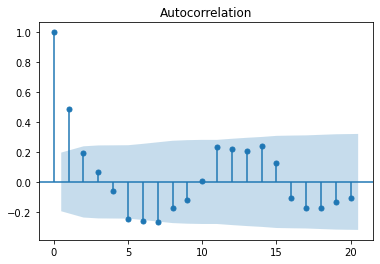

rain


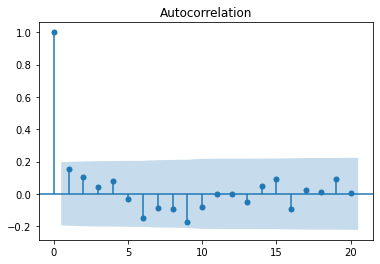

tmax


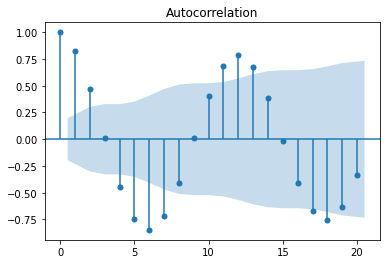

In [12]:
dataarr = ['avg_level','rain','tmax']
print('plot acf')
for i,arr in enumerate([A7,A6,A8]):
    
    print(dataarr[i])
    plot_acf(arr)
    plt.show()
    

plot acf
avg_level


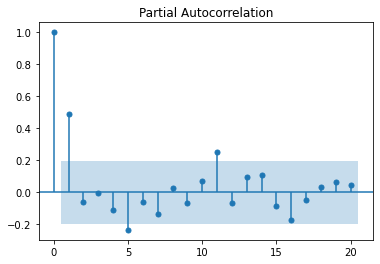

rain


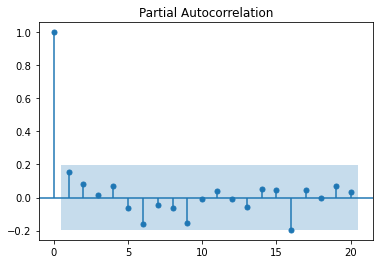

tmax


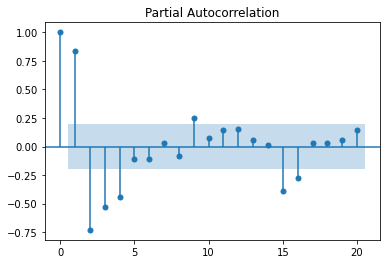

In [439]:
dataarr = ['avg_level','rain','tmax']
print('plot acf')
for i,arr in enumerate([A7,A6,A8]):   
    print(dataarr[i])
    plot_pacf(arr)
    plt.show()

After take a look to their acf and pacf, it is obvious that temperature has a strong correlation with the past values both positively and negatively. For rain participation ann river discharge, they showing less correlation. It is hard to see the correlation from the rain but for the river dicharge there is a intermediate to little sign of correlation.

This data is important, we can use take this information and use it by put them to our configuration population of our Genetic Algorithm.

#### Prepare the dataset and Model

In [11]:
df = pd.DataFrame(data={'rain':b,'tmax':b2,'river':b1})
df

,rain,tmax,river
0,0.907046,0.232432,1.000000
1,0.715142,0.091892,0.389488
2,0.577961,0.032432,0.146148
3,0.175412,0.059459,0.095013
4,0.416792,0.000000,0.144429
...,...,...,...
95,0.680660,0.443243,0.293053
96,0.163418,0.340541,0.162576
97,0.808096,0.102703,0.331091
98,1.000000,0.010811,0.441323


### Function for building dataset with various lag

In [15]:
def buildataset(df,rainlag,tlag,rivlag):
    maxlag = max([rivlag,rainlag,tlag])
    ndata = len(df) - maxlag
    
                
    raindata = []
    rainvar = []
    for i in range(rainlag):
        raindata.append(df['rain'][i:-rainlag+i])
        rainvar.append('rain'+str(rainlag-i))
    raindata.append(df['rain'][rainlag:])
    rainvar.append('rain0')
    data = np.array(raindata)[:,-ndata:]
    var = rainvar
    
    tdata=[]
    tvar=[]
    for i in range(tlag):
        tdata.append(df['tmax'][i:-tlag+i])
        tvar.append('temp'+str(tlag-i))
    tdata.append(df['tmax'][tlag:])
    tvar.append('temp0')
    data =  np.vstack((data, np.array(tdata)[:,-ndata:]))
    var.extend(tvar)
        
    rivdata = []
    rivvar = []
    for i in range(rivlag):
        rivdata.append(df['river'][i:-rivlag+i])
        rivvar.append('river'+str(rivlag-i))        
    rivdata.append(df['river'][rivlag:])
    rivvar.append('river0')
    data =  np.vstack((data, np.array(rivdata)[:,-ndata:])).T
    var.extend(rivvar)
    
    tsdf = pd.DataFrame(data= data,columns = var)
    
    return tsdf

In [25]:
tsdf = buildataset(df,2,2,1)

In [26]:
tsdf

,rain2,rain1,rain0,temp2,temp1,temp0,river1,river0
0,0.907046,0.715142,0.577961,0.232432,0.091892,0.032432,0.389488,0.146148
1,0.715142,0.577961,0.175412,0.091892,0.032432,0.059459,0.146148,0.095013
2,0.577961,0.175412,0.416792,0.032432,0.059459,0.000000,0.095013,0.144429
3,0.175412,0.416792,0.142429,0.059459,0.000000,0.324324,0.144429,0.035581
4,0.416792,0.142429,0.727136,0.000000,0.324324,0.545946,0.035581,0.136954
...,...,...,...,...,...,...,...,...
93,0.802099,0.398801,0.680660,0.789189,0.664865,0.443243,0.103960,0.293053
94,0.398801,0.680660,0.163418,0.664865,0.443243,0.340541,0.293053,0.162576
95,0.680660,0.163418,0.808096,0.443243,0.340541,0.102703,0.162576,0.331091
96,0.163418,0.808096,1.000000,0.340541,0.102703,0.010811,0.331091,0.441323


### Building NN Class

I use package insted of build-from-scratch model because from scratch code that I made is computationaly high cost and also the Genetic Algortihm is already computationaly high cost by itself.

In [494]:
class modelNN():
    
    def __init__(self,list_nh,actfunc,rnn_conf = None):
        self.rnn_conf = rnn_conf ## list(n_hidden,activation,timestep)
#         self.rainlag = listlag[0]
#         self.templag = listlag[1]
#         self.riverlag = listlag[2]
        self.list_nh = list_nh
        self.actfunc = actfunc
    
    def build_network(self,fea_X,fea_y):
        
    # definisikan layer yang akan digunakan
    # Dense berarti layer linear yang fully-connected
    # kita namakan biar ga bingung
#         inputriver = tf.keras.Input(shape=(self.riverlag,),name='in_river')
#         inputrain = tf.keras.Input(shape=(self.rainrlag,), name='in_rain')
#         inputtemp = tf.keras.Input(shape=(self.templag,),name = 'in_temp' )
        input_layer = tf.keras.Input(shape=(fea_X,),name='input')
    
        list_hl = []
        for i in range(len(self.list_nh)):
            list_hl.append(tf.keras.layers.Dense(units=self.list_nh[i], name='hidden'+str(i+1), 
                                                 activation=self.actfunc[i]))
        if self.rnn_conf != None:
            rnn_layer  = tf.keras.layers.SimpleRNN(units = self.rnn_conf[0],
                                                   input_shape=(None,self.rnn_conf[2],self.list_nh[-1]),
                                                   activation = self.rnn_conf[1])
        output_layer = tf.keras.layers.Dense(units=fea_y, name='output', activation=self.actfunc[-1])

    # definisikan alur dari jaringannya
        hidout = [list_hl[0](input_layer)]
        for i in range(len(self.list_nh)-1):
            hidout.append(list_hl[i+1](hidout[i]))
        hidden_out = tf.expand_dims(hidout[-1],axis=1)
        
        if self.rnn_conf != None:
            rnn_out = rnn_layer(hidden_out)
            output = output_layer(rnn_out)
        else:
            output = output_layer(hidout[-1])

        # definisikan jaringannya dengan input dan output
        network = tf.keras.Model(inputs=input_layer, outputs=output)
        return network
    
    def train(self,X, Y, num_iterations =1250, learning_rate = .0075):
        fea_X = X.shape[1]
        fea_y = Y.shape[1]

        network = self.build_network(fea_X, fea_y)

        # definsikan optimizer, kali ini akan digunakan Stochastic Gradient Descent
        optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
        # definisikan fungsi loss yang digunakan
        loss_fn = tf.keras.losses.MeanSquaredError()
        # definisikan metrik yang digunakan
        # metric_fn = tf.keras.metrics.MeanSquaredError()

        # iterasi
        for i in range(num_iterations):
            with tf.GradientTape() as tape:
                # forward propagation
                y_out = network(X, training=True)
                loss = loss_fn(Y, y_out)
            # backward propagation
            grads = tape.gradient(loss, network.trainable_weights)
            # optimize
            optimizer.apply_gradients(zip(grads, network.trainable_weights))
            # hitung akurasi
            # accuracy = metric_fn(Y, y_out)
            # akurasi yang dihitung masih per data, jadi kita rata-rata dulu semuanya
            # accuracy = tf.reduce_mean(accuracy)
            # cetak log
#             if i % (num_iterations // 10) == 0:
#                 print (f"Iteration {i} - Loss: {loss}")

#         print('After train model loss:'+ str(loss))  

        return network

#### The result

I put the result first before the Genetic Algorithm itself in sake of the presentation. The Genetic Algortithm itself is still dirty and pretty hard to read.

Hereby the two best result that I can get from the genetic Algorithm. It can be compared with the result from timeseries model like ARMA, ARIMA, and ARIMAX. 

In [496]:
tsdf = buildataset(df,3,2,4)
data = tsdf.to_numpy()
data.shape
X = data[:,:-1]
y = data[:,-1:]

X_train = X[:85]
y_train = y[:85]
X_test = X[85:]
y_test = y[85:]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Test loss: 0.0016478237230330706


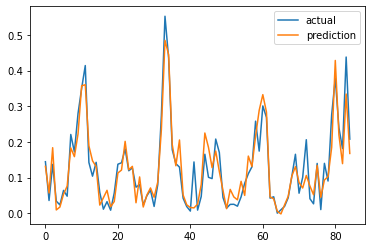

In [503]:
network = modelNN([9, 10], ['sigmoid', 'relu', 'linear'])
network = network.train(X_train,y_train,num_iterations =1250)
loss = tf.keras.losses.MeanSquaredError()
print('Test loss:', float(loss(y_train,network(X_train))))
plt.plot(y_train,label = 'actual')
plt.plot(network(X_train),label='prediction')
plt.legend()
plt.show()

Test loss: 0.0025173770263791084


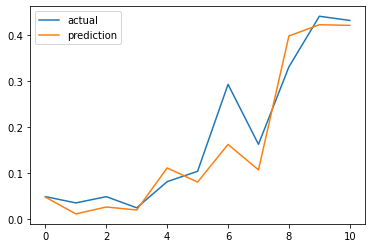

In [504]:
plt.plot(y_test,label = 'actual')
plt.plot(network(X_test),label='prediction')
loss = tf.keras.losses.MeanSquaredError()
print('Test loss:', float(loss(y_test,network(X_test))))
plt.legend()
plt.show()

In [484]:
tsdf = buildataset(df,1,6,1)
data = tsdf.to_numpy()
data.shape
X = data[:,:-1]
y = data[:,-1:]

X_train = X[:85]
y_train = y[:85]
X_test = X[85:]
y_test = y[85:]

In [485]:
tsdf

,rain1,rain0,temp6,temp5,temp4,temp3,temp2,temp1,temp0,river1,river0
0,0.142429,0.727136,0.232432,0.091892,0.032432,0.059459,0.000000,0.324324,0.545946,0.035581,0.136954
1,0.727136,0.143928,0.091892,0.032432,0.059459,0.000000,0.324324,0.545946,0.713514,0.136954,0.033650
2,0.143928,0.367316,0.032432,0.059459,0.000000,0.324324,0.545946,0.713514,0.989189,0.033650,0.023172
3,0.367316,0.505247,0.059459,0.000000,0.324324,0.545946,0.713514,0.989189,0.848649,0.023172,0.063868
4,0.505247,0.605697,0.000000,0.324324,0.545946,0.713514,0.989189,0.848649,0.659459,0.063868,0.047596
...,...,...,...,...,...,...,...,...,...,...,...
89,0.398801,0.680660,0.513514,0.675676,0.718919,0.772973,0.789189,0.664865,0.443243,0.103960,0.293053
90,0.680660,0.163418,0.675676,0.718919,0.772973,0.789189,0.664865,0.443243,0.340541,0.293053,0.162576
91,0.163418,0.808096,0.718919,0.772973,0.789189,0.664865,0.443243,0.340541,0.102703,0.162576,0.331091
92,0.808096,1.000000,0.772973,0.789189,0.664865,0.443243,0.340541,0.102703,0.010811,0.331091,0.441323


In [491]:
network = modelNN([18,1],['relu', 'tanh', 'sigmoid'],[5, 'tanh', 1])
#rnnconf list(n_hidden,activation,timestep)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Test loss: 0.00161543523427099


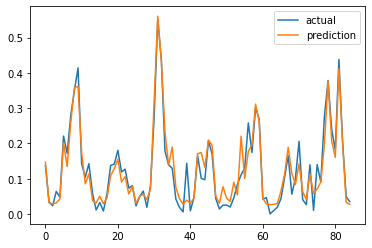

In [492]:
network = network.train(X_train,y_train,num_iterations =1250)
loss = tf.keras.losses.MeanSquaredError()
print('Test loss:', float(loss(y_train,network(X_train))))
plt.plot(y_train,label = 'actual')
plt.plot(network(X_train),label='prediction')
plt.legend()
plt.show()

Test loss: 0.00161543523427099


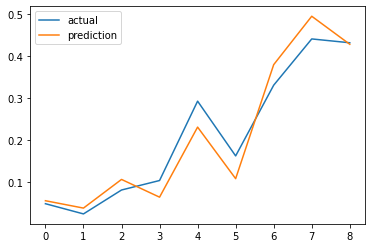

In [493]:
plt.plot(y_test,label = 'actual')
plt.plot(network(X_test),label='prediction')
loss = tf.keras.losses.MeanSquaredError()
print('Test loss:', float(loss(y_test,network(X_test))))
plt.legend()
plt.show()

### The Genetic Algorithm

In [460]:
## Genetic Algorithm

"""
Kita akan menggunakan genetic algortihm untuk mencari parameter optimal untuk
lag dari masing masing variabel, kombinasi banyaknya hidden layer dan n tiap layer(list)
activation function(list dengan panjang list_hlayer+1),
dan juga diperlukannya RNN ataupun tidak
"""

## Inisiasi populasi
def populasi(n): # banyaknya anggota populasi
    
    pop_list = []
    #bentuk tiap conf_list adalah [[lag],[nh,activation,RNN/None]]
    
    
    for i in range(n):
        conf_list = []
        left_list = []
        
        lag =[]
        ## Inisiasi lag
        for i in range(3):
            lag_i = np.random.randint(1, high=7)
            lag.append(lag_i)
        conf_list.append(lag)
        
        ## Inisiasi n_h bisa 1 s/d 3 hidden layer tanpa RNN
        k = np.random.randint(1,high=4)
        nh = []
        
        for i in range(k):
            nh.append(np.random.randint(1,high= 21))
        left_list.append(nh)
        
        ## Inisiasi activation function
        actf_list = ['relu','linear','sigmoid','tanh']
        chosen_actf = [] 
        for i in range(k+1):
            chosen_actf.append(random.choice(actf_list))
        left_list.append(chosen_actf)
            
        
        ## buat rnn atau tidak
        p = random.choice([0,1])
        if p == 0:
            rnn_conf=[]
            rnn_conf.append(np.random.randint(3,8))
            rnn_conf.append(random.choice(actf_list))
            rnn_conf.append(random.choice([1,2]))
            left_list.append(rnn_conf)
        
        conf_list.append(left_list)
        
        pop_list.append(conf_list)       
        
    
    # return inisiasi
    return pop_list

def calc_fitness(n,pop_list):
    
    '''Evaluation phase'''
    
    test_loss_pop=[]
    for i in range(n):
        
        ## Inisialisasi lag data
        tsdf = buildataset(df,pop_list[i][0][0],pop_list[i][0][1],pop_list[i][0][2])
        data = tsdf.to_numpy(dtype=np.float32)
        
        X = data[:,:-1]
        y = data[:,-1:]

        X_train = X[:85]
        y_train = y[:85]
        X_test = X[85:]
        y_test = y[85:]
        
        if len(pop_list[i][1]) == 2:
            network = modelNN(pop_list[i][1][0],pop_list[i][1][1])
        else:
            network = modelNN(pop_list[i][1][0],pop_list[i][1][1],pop_list[i][1][2])
            
        network = network.train(X_train, y_train, num_iterations =1250)
        if  i%5 == 0:
            print('train individual ke-',i)
            
        loss = tf.keras.losses.MeanSquaredError()
        test_loss = loss(y_test,network(X_test))
        
        test_loss_pop.append(test_loss)
        test_loss_arr = np.array(test_loss_pop)
        test_loss_mean = test_loss_arr.mean()
        
    #selecting parents
    lowest_loss_idk = np.argpartition(test_loss_arr, 3)
        
    return test_loss_pop, test_loss_mean, lowest_loss_idk

def crossover(pop_list,lowest_loss_idk):
    
    parents = np.random.choice(lowest_loss_idk,2)
    parent1 = pop_list[parents[0]] ## pilih 2 gen dr populasi
    parent2 = pop_list[parents[1]]
    child = [parent1[0]]
    
    for i in range(3):
        p = np.random.uniform() #probability to crossover lag trait
        if p < 0.4:
            child[0][i] = parent2[0][i]
    
    nn_trait = parent1[1]
    
    ## take n_h smallest
    min_nh = min(len(parent1[1][0]),len(parent2[1][0]))
    
    
    for i in range(2):
        if i == 0: ## cross over nilai n_h       
            for j in range(min_nh):
                p = np.random.uniform()
                if p < 0.5:
                    nn_trait[i][j] = parent2[1][i][j]
                    
        if i == 1: ## cross over activation function     
            for j in range(min_nh+1):
                p = np.random.uniform()
                if p < 0.5:
                    nn_trait[i][j] = parent2[1][i][j]
                    
    if len(parent1[1]) == 3 and len(parent2[1]) == 3: ## crossover rnn
        for i in range(3):
            p = np.random.uniform()
            if p < 0.4:
                nn_trait[2][i] = parent2[1][2][i]
                
    child.append(nn_trait)
    
    return child

def mutation():
    a = populasi(1)
    new_child = a[0]
    
    return new_child           
                           

In [406]:
## run Genetic Algorithm
pop_list = populasi(10)
test_loss_array = []
history=[]

for iter in range(10): ## 10 generation
    test_loss_pop, test_loss_mean, lowest_loss_idk = calc_fitness(10,pop_list)
    test_loss_array.append(test_loss_mean)
    
    newpop_list =[]
    for gen in range(3):
        newpop_list.append(pop_list[lowest_loss_idk[gen]])
        
    for j in range(7):
        child = crossover(pop_list,lowest_loss_idk)
        p = np.random.uniform()
        if p < 0.01:
            child = mutation()
        
        newpop_list.append(child)
        
    pop_list = newpop_list
    
    if iter == 0 or iter == 6:
        history.append(test_loss_pop)
    
test_loss_pop, test_loss_mean, lowest_loss_idk = calc_fitness(10,pop_list)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

In [409]:
np.array(test_loss_array)

array([0.01502282, 0.01650262, 0.01445572, 0.01439717, 0.00801283,
       0.01602451, 0.01714088, 0.01183474, 0.00963402, 0.02771139],
      dtype=float32)

In [411]:
test_loss_pop

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0041693794>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0033711658>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0316007>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.004565572>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.031598024>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0016654936>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0017393612>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0013495447>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0012239725>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0028092158>]

In [412]:
pop_list

[[[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]],
 [[1, 6, 1], [[18, 1], ['relu', 'tanh', 'sigmoid'], [5, 'tanh', 1]]]]

In [416]:
## run Genetic Algorithm

pop_list = populasi(20)
test_loss_array = []
history=[]
pop_list_0 = pop_list

for i in range(7): ## 10 generation
    test_loss_pop, test_loss_mean, lowest_loss_idk = calc_fitness(20,pop_list)
    test_loss_array.append(test_loss_mean)
    
    newpop_list =[]
    for gen in range(5):
        newpop_list.append(pop_list[lowest_loss_idk[gen]])
        
    for j in range(15):
        child = crossover(pop_list,lowest_loss_idk)
        p = np.random.uniform()
        if p < 0.1:
            child = mutation()
        
        newpop_list.append(child)
        
    pop_list = newpop_list
    
    print('Gen '+str(i)+' passed')
    
test_loss_pop, test_loss_mean, lowest_loss_idk = calc_fitness(20,pop_list)

Gen 0 passed
Gen 1 passed
Gen 2 passed
Gen 3 passed
Gen 4 passed
Gen 5 passed
Gen 6 passed


In [424]:
test_loss_pop

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0035074253>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00966241>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0026170495>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.008427153>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.005927742>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.011215084>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0062749945>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0069088796>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0037666757>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0035779737>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.009124513>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00537146>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.029251475>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.006296088>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.01017199>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0108666215>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0029694121>,
 <tf.Tens

In [423]:
pop_list

[[[3, 5, 1], [[10], ['relu', 'sigmoid']]],
 [[1, 4, 1], [[10, 18], ['relu', 'sigmoid', 'sigmoid'], [3, 'relu', 1]]],
 [[1, 5, 3], [[10], ['linear', 'linear'], [3, 'linear', 2]]],
 [[2, 5, 5], [[10, 16], ['tanh', 'relu', 'sigmoid']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[2, 5, 5], [[10, 16], ['tanh', 'relu', 'sigmoid']]],
 [[3, 5, 1], [[10], ['relu', 'sigmoid']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[3, 5, 1], [[10], ['relu', 'sigmoid']]],
 [[5, 5, 1], [[10, 12, 1], ['relu', 'linear', 'relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]],
 [[5, 5, 1], [[10], ['relu', 'linear']]]]

In [461]:
## run Genetic Algorithm
pop_list = populasi(15)
test_loss_array = []
history=[]
pop_list_0 = pop_list

for i in range(15): ## 15 generation
    test_loss_pop, test_loss_mean, lowest_loss_idk = calc_fitness(15,pop_list)
    test_loss_array.append(test_loss_mean)
    
    newpop_list =[]
    for gen in range(5):
        newpop_list.append(pop_list[lowest_loss_idk[gen]])
        
    for j in range(10):
        child = crossover(pop_list,lowest_loss_idk)
        p = np.random.uniform()
        if p < 0.1:
            child = mutation()
        
        newpop_list.append(child)
        
    pop_list = newpop_list
    
    print('Gen '+str(i)+' passed')
    
test_loss_pop, test_loss_mean, lowest_loss_idk = calc_fitness(15,pop_list)

train individual ke- 0
train individual ke- 1
train individual ke- 2
train individual ke- 3
train individual ke- 4
train individual ke- 5
train individual ke- 6
train individual ke- 7
train individual ke- 8
train individual ke- 9
train individual ke- 10
train individual ke- 11
train individual ke- 12
train individual ke- 13
train individual ke- 14
Gen 0 passed
train individual ke- 0
train individual ke- 1
train individual ke- 2
train individual ke- 3
train individual ke- 4
train individual ke- 5
train individual ke- 6
train individual ke- 7
train individual ke- 8
train individual ke- 9
train individual ke- 10
train individual ke- 11
train individual ke- 12
train individual ke- 13
train individual ke- 14
Gen 1 passed
train individual ke- 0
train individual ke- 1
train individual ke- 2
train individual ke- 3
train individual ke- 4
train individual ke- 5
train individual ke- 6
train individual ke- 7
train individual ke- 8
train individual ke- 9
train individual ke- 10
train individual ke-

In [239]:
network = modelNN(a[0][1][0],a[0][1][1])

In [ ]:
def crossover(pop_list,lowest_loss_idk):
    
    parents = np.random.choice(lowest_loss_idk)
    parent1 = pop_list[parents[0]]
    parent2 = pop_list[parents[1]]
    
    ## dna crossover
    for i in range(2):
        
        
        if i == 0:
            
            for j in range(len(parent1):
                
                p = np.random.uniform()
                if p < 0.3:
                    k = parent2[0][j]
                    parent2[0][j] = parent1[0][j]
                           
                           
                           
                    k